In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

### Задание
Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [88]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [89]:

df.drop(columns=['petal length (cm)', 'petal width (cm)'], inplace=True)
df['variety'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


Разделите данные на выборку для обучения и тестирования


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, df['variety'], random_state=42)

In [91]:
len(y_test)

38

Постройте модель LDA


In [102]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

Визуализируйте предсказания для тестовой выборки и центры классов


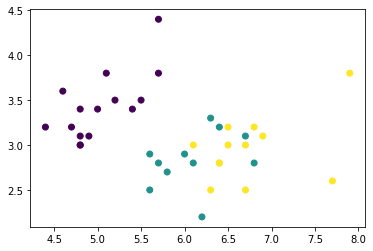

In [121]:
# Тестовая выборка
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

plt.scatter(x=small_test['sepal length (cm)'], y=small_test['sepal width (cm)'], c=y_test)
plt.show()

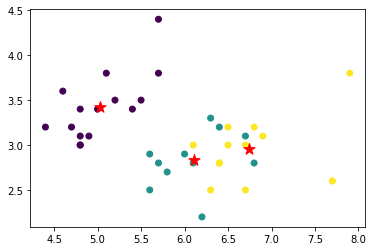

In [135]:
# Центры классов
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_test, y_test)

plt.scatter(x=small_test['sepal length (cm)'], y=small_test['sepal width (cm)'], c=y_test)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=140, marker='*')
plt.show()

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width


In [141]:
df_cluster = df.drop(columns=['variety'])
df_cluster.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

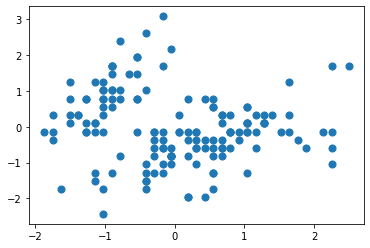

In [150]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cluster)

plt.scatter(scaled[:, 0], scaled[:, 1], cmap='autumn', s=50)

D:\DataSci\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


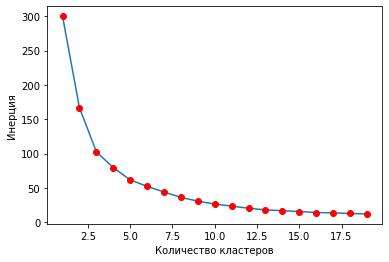

In [158]:
# строим график локтя
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans=KMeans(n_clusters=k)
    clf_kmeans.fit(scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

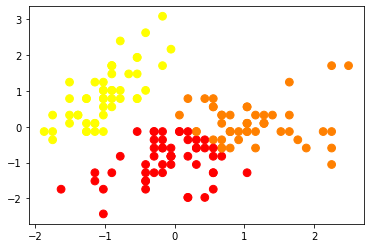

In [171]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled)

plt.scatter(scaled[:, 0], scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.show()